<a href="https://colab.research.google.com/github/yeesem2002/Machine-Learning-Project/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diabetes Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Read the dataset
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/yeesem2002/Machine-Learning/main/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Print the info of the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Print the statistics of the dataset
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Check for null values
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Replace the 0 values with NAN
column = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in column:
    diabetes_df[i].replace(0,np.nan,inplace=True)

# Show the count of null values
print(diabetes_df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Calculate median according to output
# Define a function
def feature_median(var):
    temp = diabetes_df[diabetes_df[var].notnull()]
    temp = temp[[var,'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
feature_median('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [ ]:
feature_median('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [ ]:
feature_median('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [ ]:
feature_median('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [ ]:
feature_median('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [ ]:
# Filling null values with median values of the respective features
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in columns:
    feature_median(i)
    diabetes_df.loc[(diabetes_df['Outcome']==0) & (diabetes_df[i].isnull()),i]= feature_median(i)[i][0]
    diabetes_df.loc[(diabetes_df['Outcome']==1) & (diabetes_df[i].isnull()),i]= feature_median(i)[i][1]

In [ ]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data Visualization

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

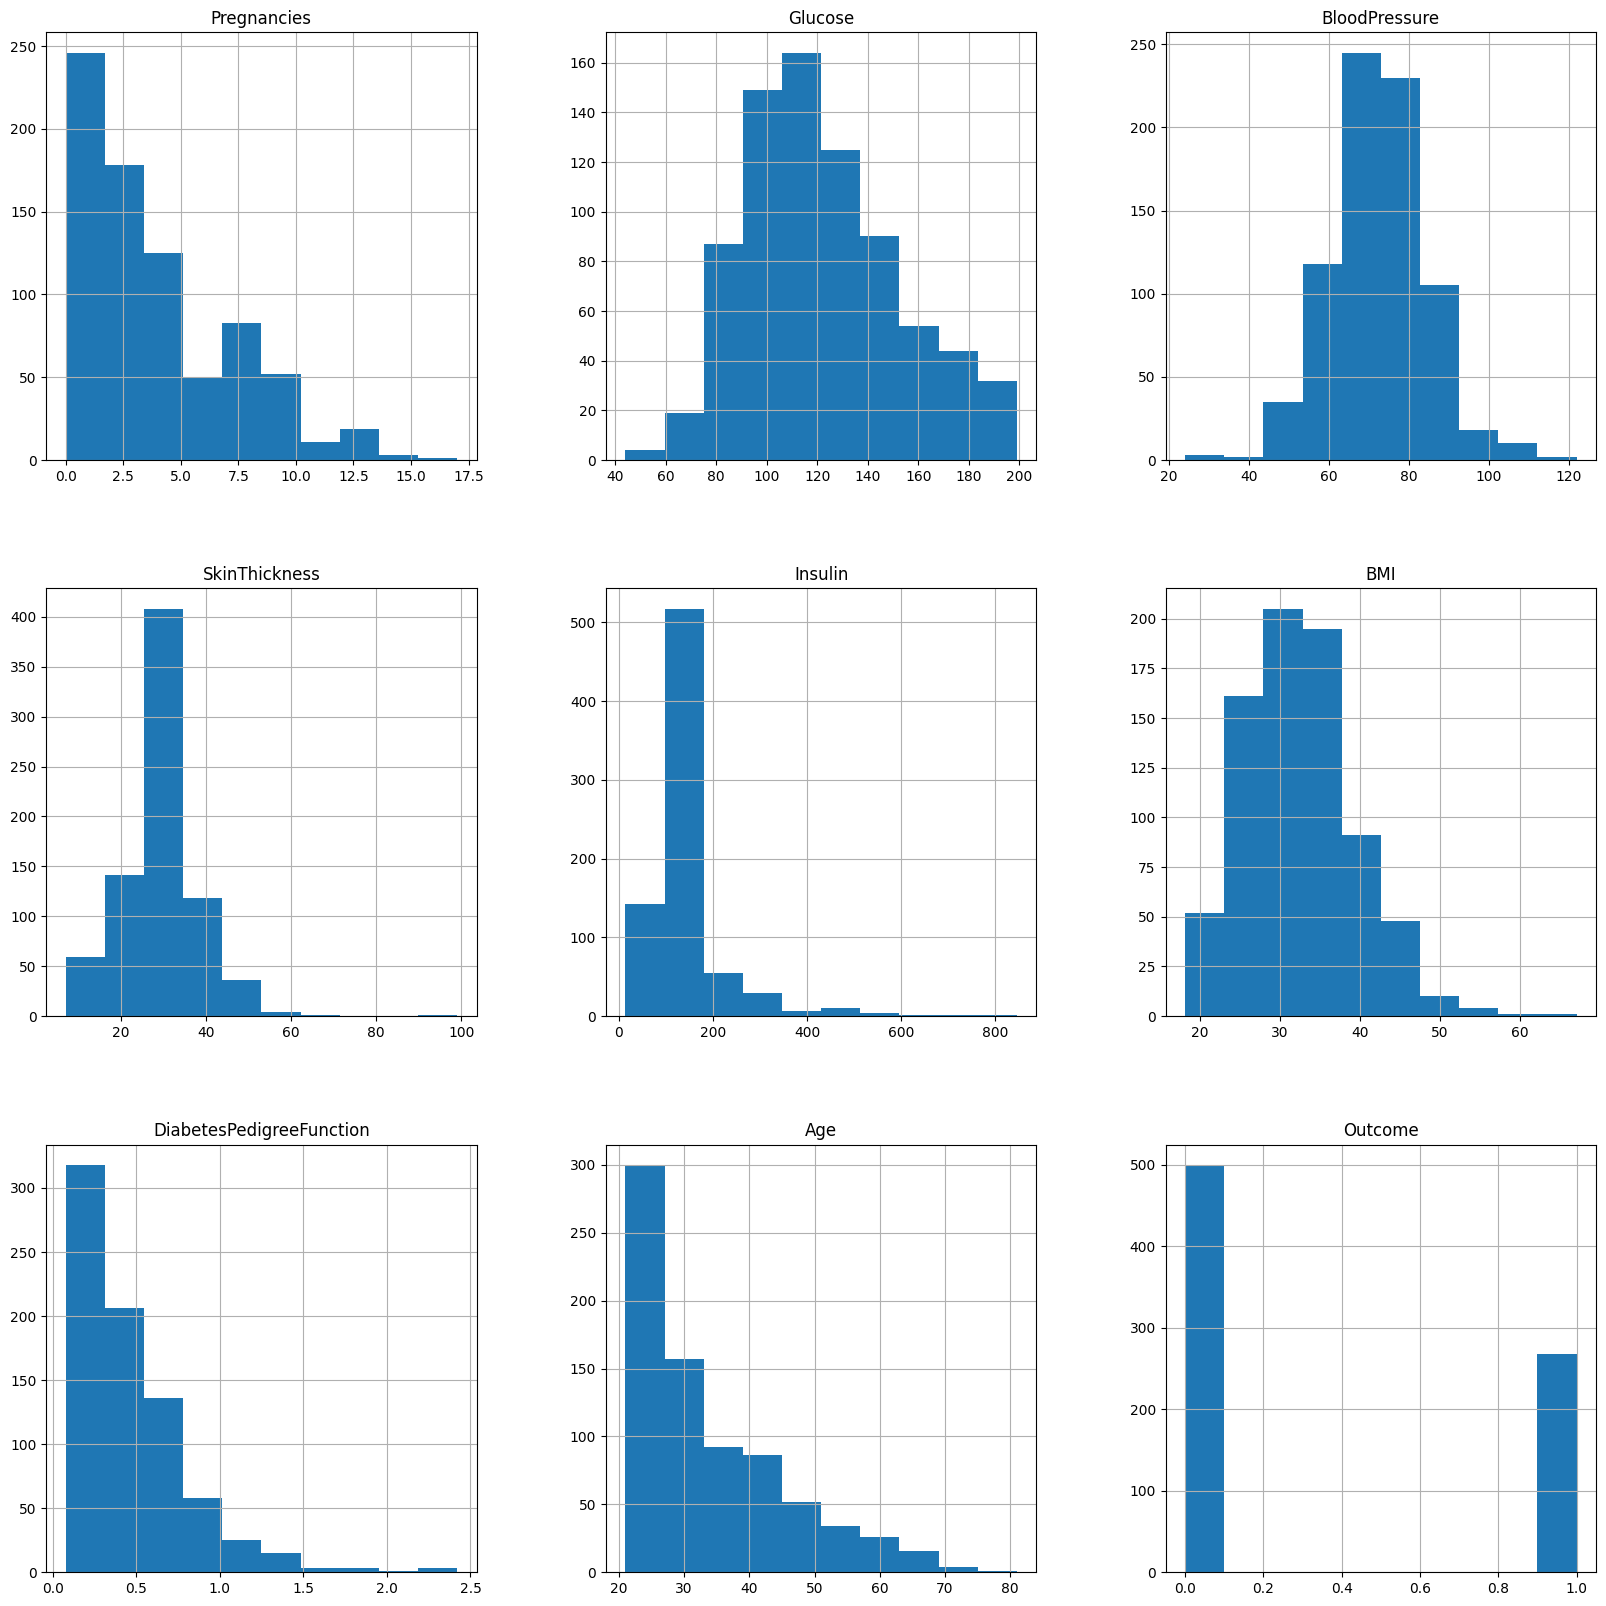

In [ ]:
diabetes_df.hist(figsize=(20,20))

Outcome
0    500
1    268
Name: count, dtype: int64


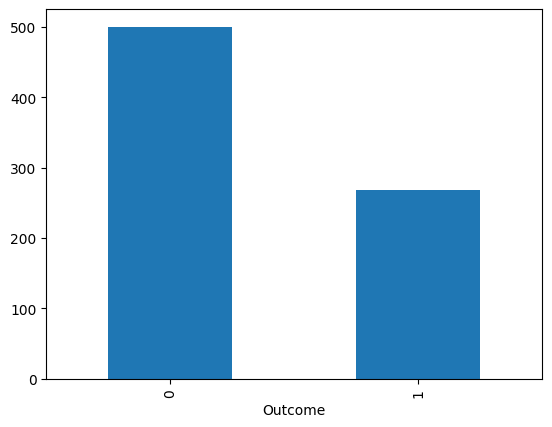

In [ ]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

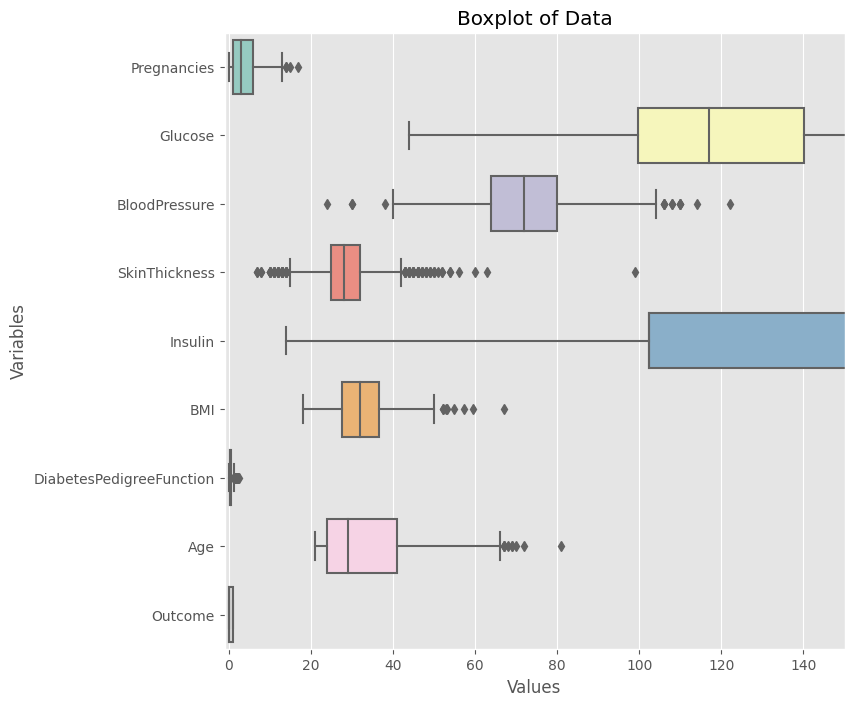

In [ ]:
# Check for outliers in the data
plt.style.use('ggplot')

fig,ax = plt.subplots(figsize=(8,8))
ax.set(xlim=(-1,150))
plt.ylabel('Variables')
plt.xlabel('Values')
plt.title('Boxplot of Data')
ax = sns.boxplot(data=diabetes_df,orient='h',palette='Set3')


<Axes: xlabel='Outcome'>

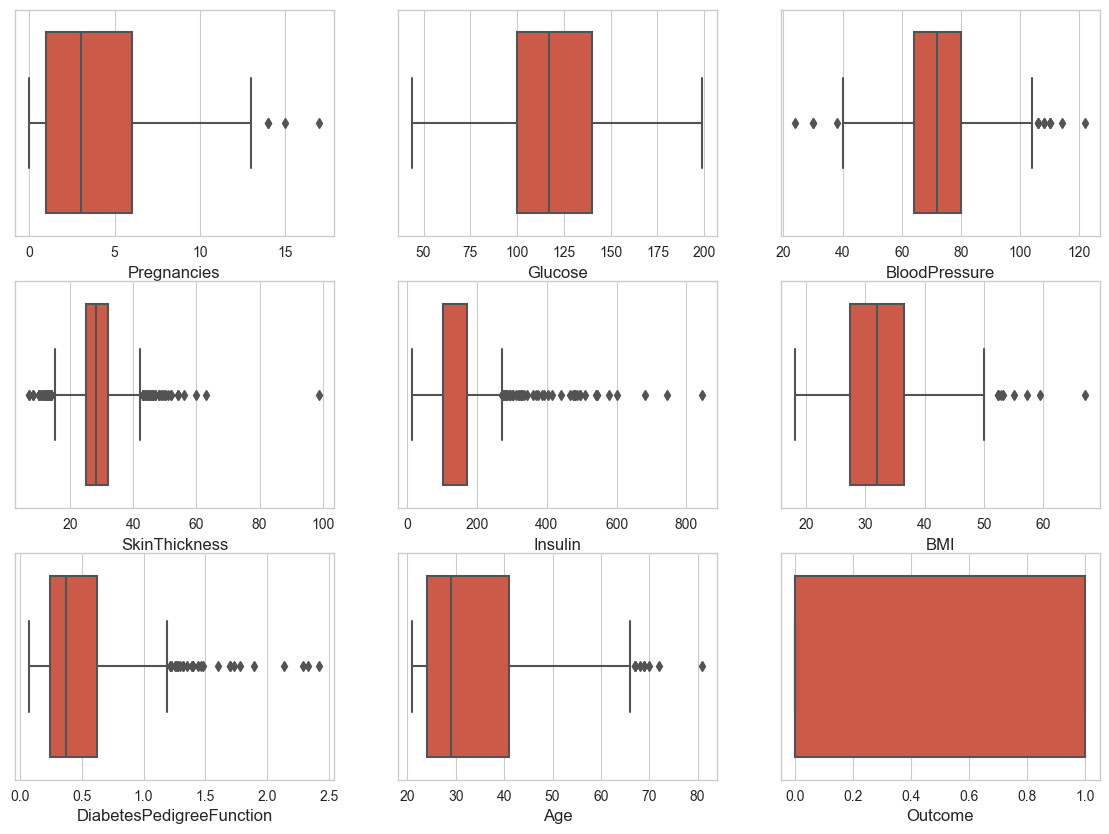

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Pregnancies',data=diabetes_df)
plt.subplot(3,3,2)
sns.boxplot(x='Glucose',data=diabetes_df)
plt.subplot(3,3,3)
sns.boxplot(x='BloodPressure',data=diabetes_df)
plt.subplot(3,3,4)
sns.boxplot(x='SkinThickness',data=diabetes_df)
plt.subplot(3,3,5)
sns.boxplot(x='Insulin',data=diabetes_df)
plt.subplot(3,3,6)
sns.boxplot(x='BMI',data=diabetes_df)
plt.subplot(3,3,7)
sns.boxplot(x='DiabetesPedigreeFunction',data=diabetes_df)
plt.subplot(3,3,8)
sns.boxplot(x='Age',data=diabetes_df)
plt.subplot(3,3,9)
sns.boxplot(x='Outcome',data=diabetes_df)

<Axes: xlabel='Outcome', ylabel='Insulin'>

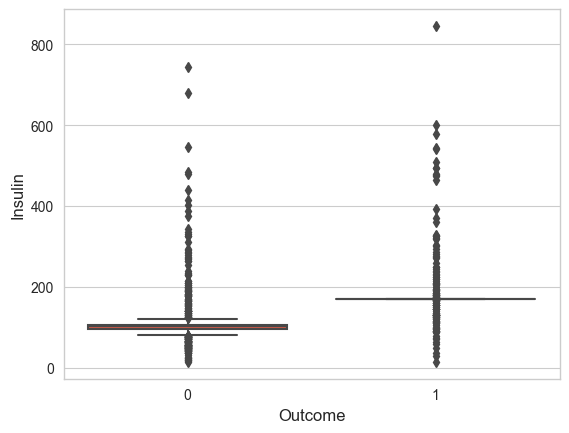

In [ ]:
sns.boxplot(x='Outcome',y='Insulin',data=diabetes_df)

<Axes: xlabel='BMI', ylabel='Glucose'>

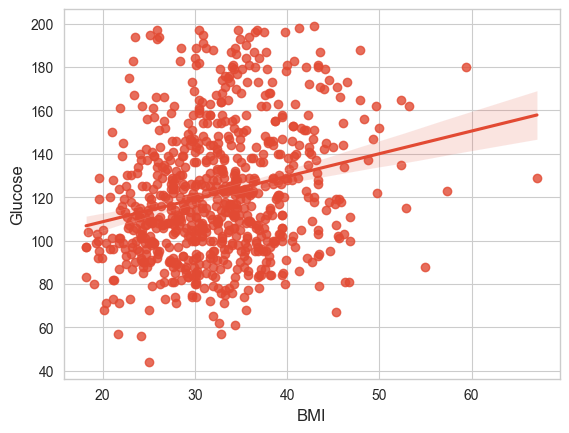

In [ ]:
sns.regplot(x='BMI',y='Glucose',data=diabetes_df)

<Axes: xlabel='Glucose', ylabel='Insulin'>

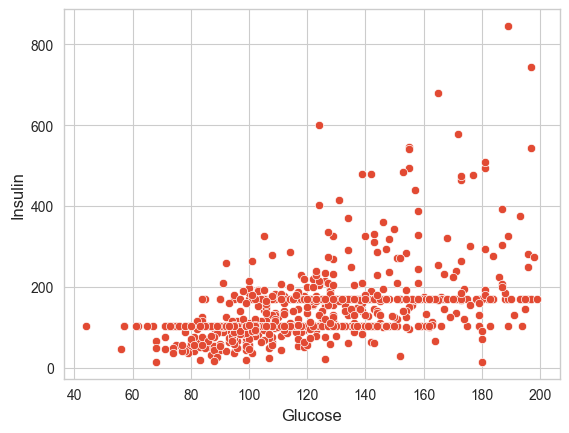

In [ ]:
sns.scatterplot(x='Glucose',y='Insulin',data=diabetes_df)

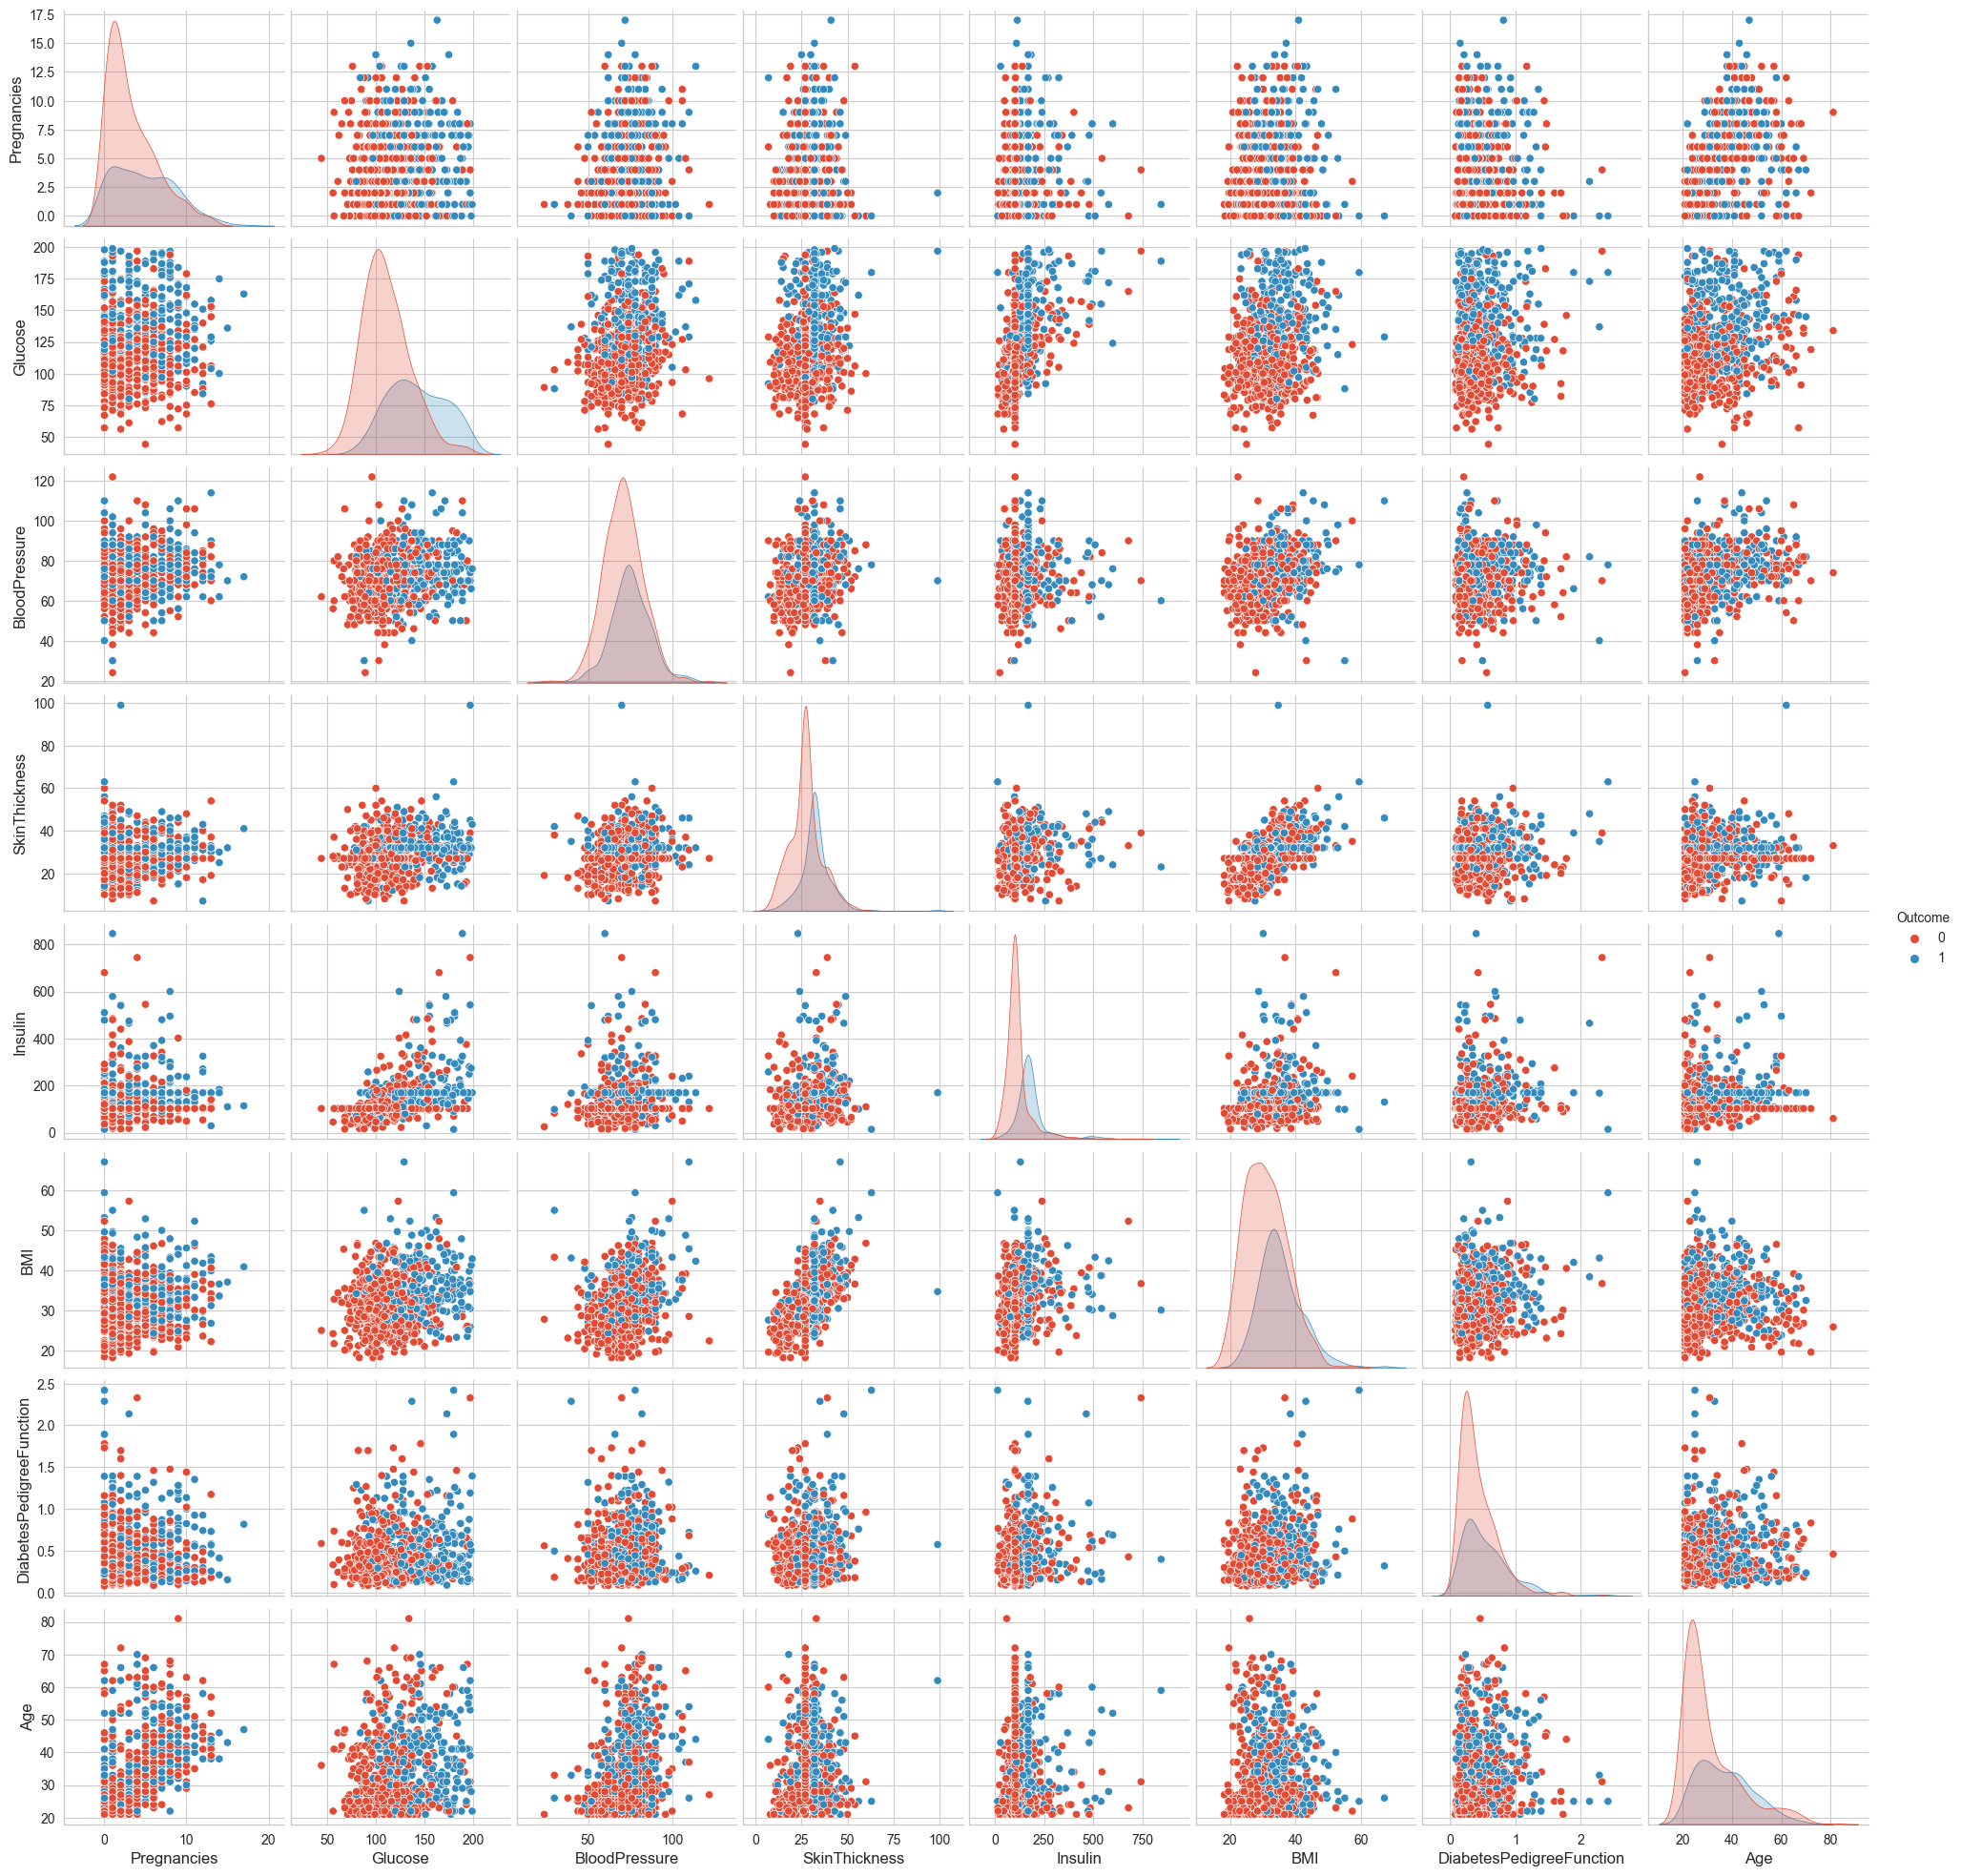

In [ ]:
sns.pairplot(diabetes_df,hue='Outcome')

<Axes: xlabel='Glucose', ylabel='Insulin'>

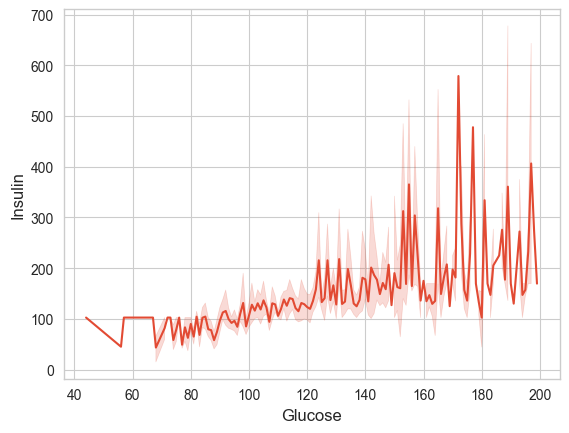

In [ ]:
sns.lineplot(x='Glucose',y='Insulin',data=diabetes_df)

## Data Preprocessing

In [ ]:
# Define a method to calculate lower bound and upper bound
def calculate_outlier_bounds(data,variable):
    Q1 = np.percentile(data[variable],25)
    Q3 = np.percentile(data[variable],75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [ ]:
# Calculate and print the lower bound and upper bound of the variables
variable_list = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for variable in variable_list:
    lower_bound,upper_bound=calculate_outlier_bounds(diabetes_df,variable)
    print(f"Variable: {variable}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print()

Variable: Pregnancies
Lower Bound: -6.5
Upper Bound: 13.5

Variable: Glucose
Lower Bound: 39.0
Upper Bound: 201.0

Variable: BloodPressure
Lower Bound: 40.0
Upper Bound: 104.0

Variable: SkinThickness
Lower Bound: 14.5
Upper Bound: 42.5

Variable: Insulin
Lower Bound: 2.0
Upper Bound: 270.0

Variable: BMI
Lower Bound: 13.849999999999998
Upper Bound: 50.25

Variable: DiabetesPedigreeFunction
Lower Bound: -0.32999999999999996
Upper Bound: 1.2

Variable: Age
Lower Bound: -1.5
Upper Bound: 66.5



<Axes: ylabel='Pregnancies'>

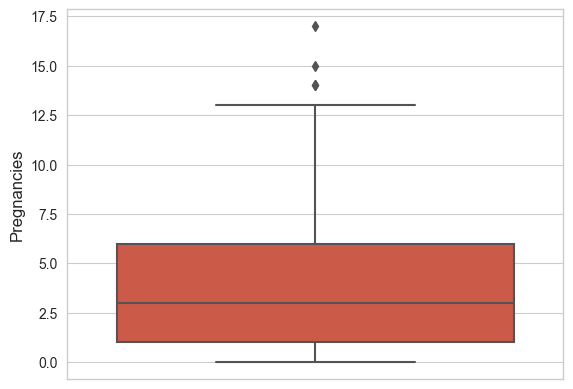

In [ ]:
# Check for outliers
sns.boxplot(y=diabetes_df.Pregnancies)

In [ ]:
# Get median value
feature_median('Pregnancies')

,Outcome,Pregnancies
0,0,2.0
1,1,4.0


In [ ]:
# Replace the outliers with median values
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['Pregnancies']>13), 'Pregnancies'] = 2
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['Pregnancies']>13), 'Pregnancies'] = 4
diabetes_df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      72
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
Name: count, dtype: int64

<Axes: ylabel='BloodPressure'>

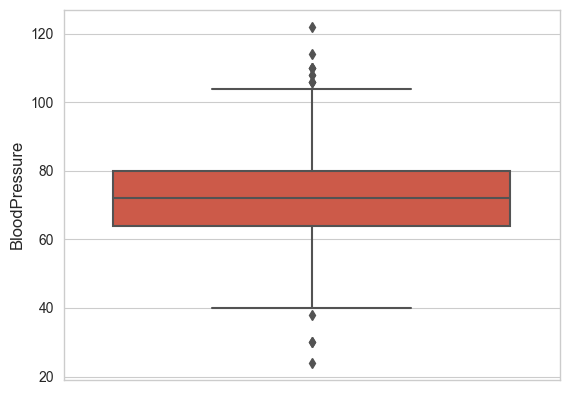

In [ ]:
# Check for outliers
sns.boxplot(y=diabetes_df.BloodPressure)

In [ ]:
# Get the median value
feature_median('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


<Axes: ylabel='BloodPressure'>

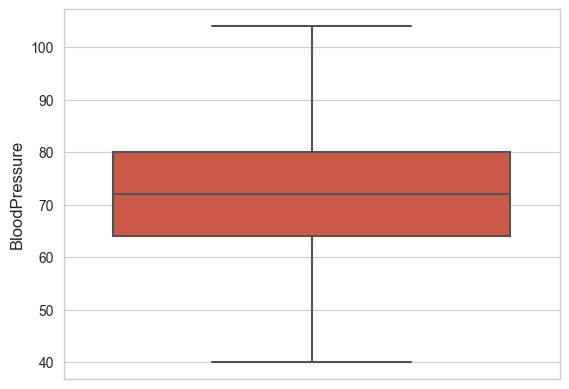

In [ ]:
# Replace the outliers with median value
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['BloodPressure']<40), 'BloodPressure'] = 70
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['BloodPressure']<40), 'BloodPressure'] = 74.5
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['BloodPressure']>104), 'BloodPressure'] = 70
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['BloodPressure']>104), 'BloodPressure'] = 74.5
sns.boxplot(y=diabetes_df.BloodPressure)

<Axes: ylabel='SkinThickness'>

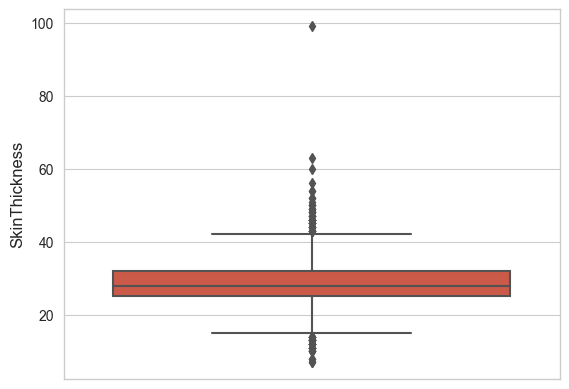

In [ ]:
# Check for outliers
sns.boxplot(y=diabetes_df.SkinThickness)

In [ ]:
# Get the median value
feature_median('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


<Axes: ylabel='SkinThickness'>

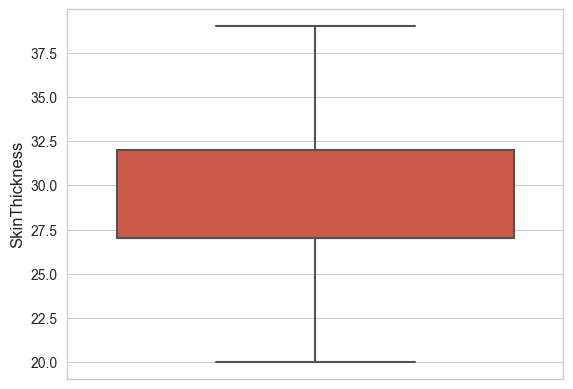

In [ ]:
# Replace the outliers with median values
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['SkinThickness']<20), 'SkinThickness'] = 27
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['SkinThickness']<20), 'SkinThickness'] = 32
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['SkinThickness']>39), 'SkinThickness'] = 27
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['SkinThickness']>39), 'SkinThickness'] = 32
sns.boxplot(y=diabetes_df.SkinThickness)

<Axes: ylabel='Insulin'>

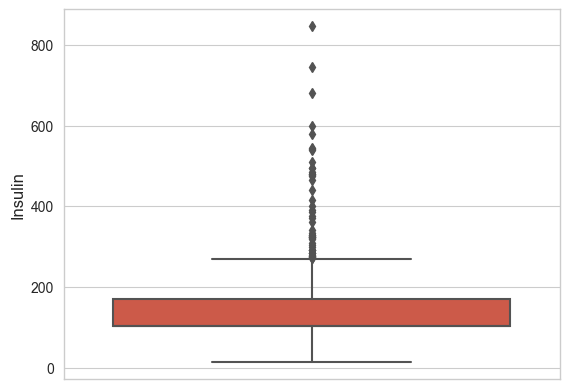

In [ ]:
# Check for outliers
sns.boxplot(y=diabetes_df['Insulin'])

In [ ]:
# Get the median values
feature_median('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


<Axes: ylabel='Insulin'>

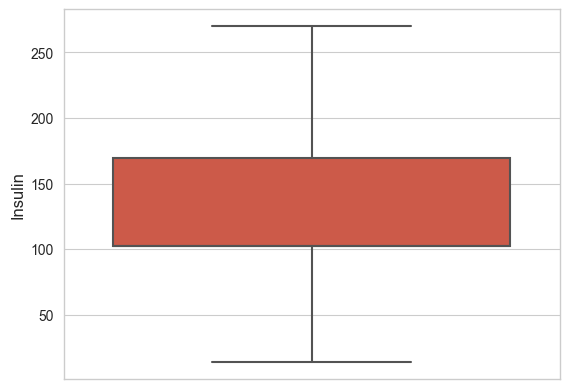

In [ ]:
# Replace the outliers with median values
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['Insulin']>270), 'Insulin'] = 102.5
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['Insulin']>270), 'Insulin'] = 169.5
sns.boxplot(y=diabetes_df.Insulin)

<Axes: ylabel='BMI'>

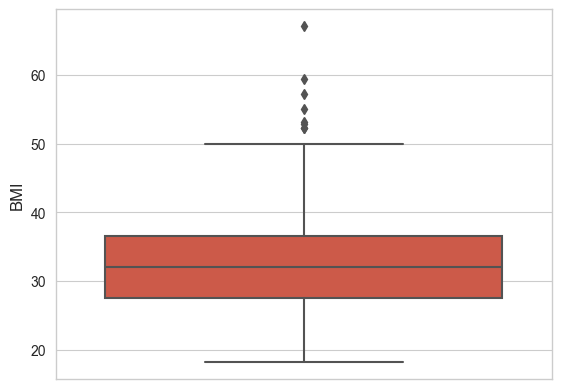

In [ ]:
# Check for outliers
sns.boxplot(y=diabetes_df.BMI)

In [ ]:
# Get the median value
feature_median('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


<Axes: ylabel='BMI'>

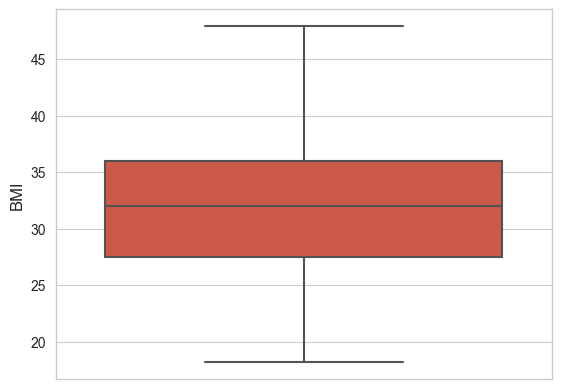

In [ ]:
# Replace the outliers with median values
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['BMI']>48), 'BMI'] = 30.1
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['BMI']>48), 'BMI'] = 34.3
sns.boxplot(y=diabetes_df.BMI)

<Axes: ylabel='DiabetesPedigreeFunction'>

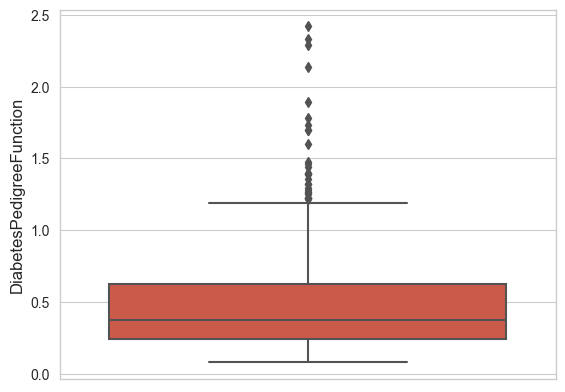

In [ ]:
# Check for outliers
sns.boxplot(y=diabetes_df.DiabetesPedigreeFunction)

In [ ]:
# Get the median value
feature_median('DiabetesPedigreeFunction')

,Outcome,DiabetesPedigreeFunction
0,0,0.336
1,1,0.449


<Axes: ylabel='DiabetesPedigreeFunction'>

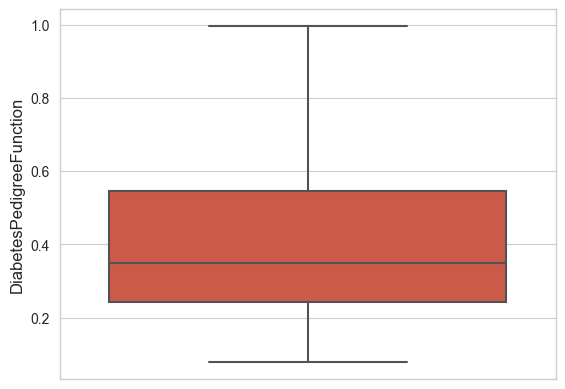

In [ ]:
# Replace the outliers with median values
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['DiabetesPedigreeFunction']>1), 'DiabetesPedigreeFunction'] = 0.336
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['DiabetesPedigreeFunction']>1), 'DiabetesPedigreeFunction'] = 0.449
sns.boxplot(y=diabetes_df.DiabetesPedigreeFunction)

<Axes: ylabel='Age'>

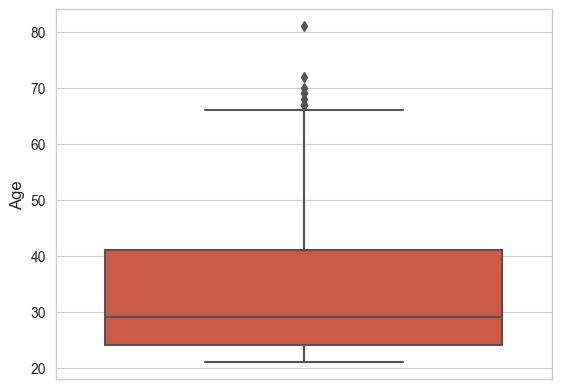

In [ ]:
# Check for outliers
sns.boxplot(y=diabetes_df.Age)

In [ ]:
# Get the median value
feature_median('Age')

,Outcome,Age
0,0,27.0
1,1,36.0


<Axes: ylabel='Age'>

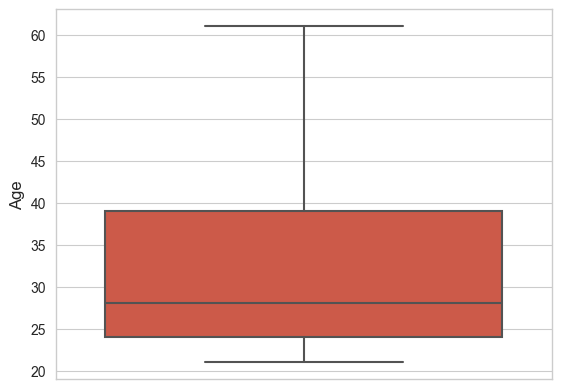

In [ ]:
# Replace the outliers with median values
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['Age']>61), 'Age'] = 27
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['Age']>61), 'Age'] = 36
sns.boxplot(y=diabetes_df.Age)

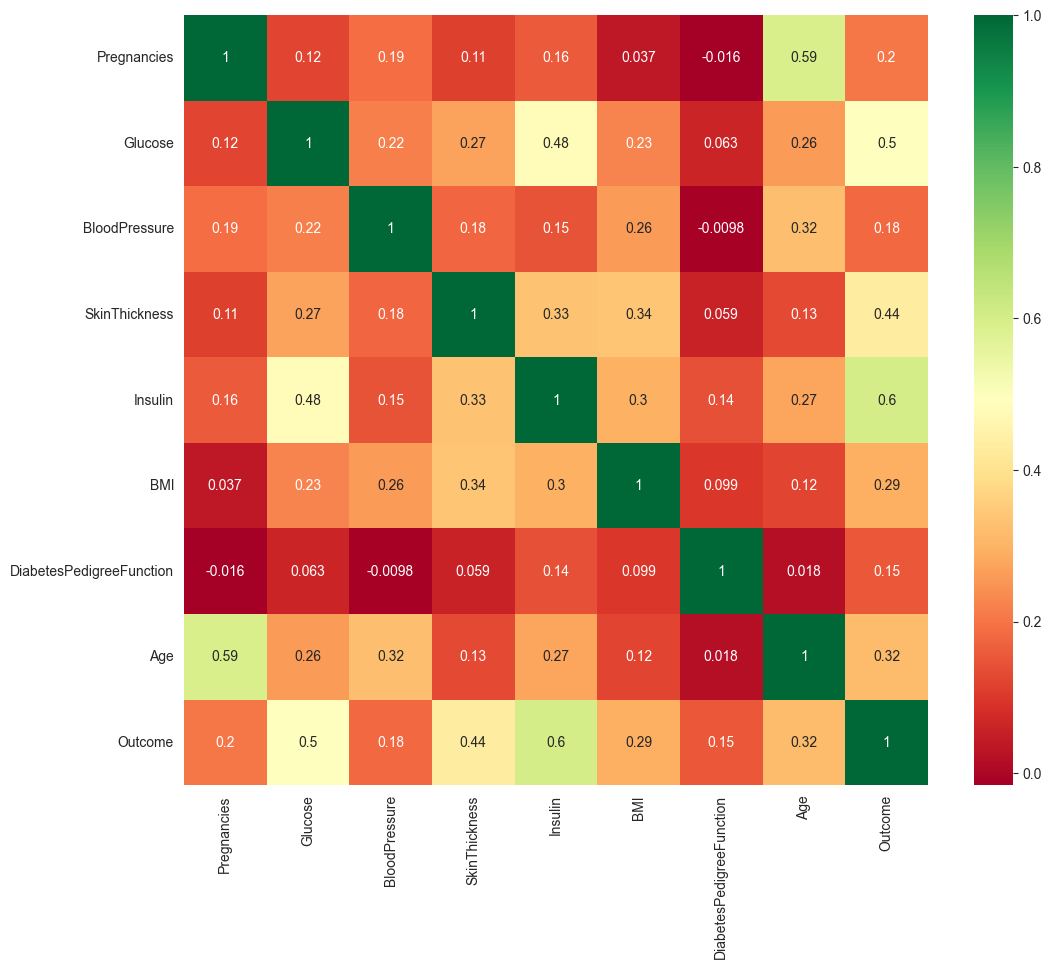

In [ ]:
# Heatmap to display correlation matrix
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
# Scaling the data
scaler = StandardScaler()
X = diabetes_df.drop(['Outcome'],axis=1)
y = diabetes_df['Outcome']

X = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
results = []

## Model Training

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report,confusion_matrix

rfc = RandomForestClassifier(n_estimators=200,max_depth=20,random_state=42)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

#Evaluate the model
rfc_acc = accuracy_score(y_test,rfc_pred)
rfc_f1 = f1_score(y_test,rfc_pred)
rfc_precision = precision_score(y_test,rfc_pred)
rfc_recall = recall_score(y_test,rfc_pred)

results.append(['Random Forest',rfc_acc,rfc_f1,rfc_precision,rfc_recall])

print('Accuracy score:',rfc_acc)
print('F1 score:',rfc_f1)
print('Precision score:',rfc_precision)
print('Recall score:',rfc_recall)

Accuracy score: 0.9155844155844156
F1 score: 0.8925619834710744
Precision score: 0.8709677419354839
Recall score: 0.9152542372881356


In [ ]:
report = classification_report(y_test,rfc_pred)
print("Classification Report:\n",report)

matrix = confusion_matrix(y_test,rfc_pred)
print("Confusion Matrix:\n",matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        95
           1       0.87      0.92      0.89        59

    accuracy                           0.92       154
   macro avg       0.91      0.92      0.91       154
weighted avg       0.92      0.92      0.92       154

Confusion Matrix:
 [[87  8]
 [ 5 54]]


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

#Evaluate the model
dtree_acc = accuracy_score(y_test,dtree_pred)
dtree_f1 = f1_score(y_test,dtree_pred)
dtree_precision = precision_score(y_test,dtree_pred)
dtree_recall = recall_score(y_test,dtree_pred)

results.append(['Decision Tree',dtree_acc,dtree_f1,dtree_precision,dtree_recall])

print('Accuracy score:',dtree_acc)
print('F1 score:',dtree_f1)
print('Precision score:',dtree_precision)
print('Recall score:',dtree_recall)

Accuracy score: 0.8636363636363636
F1 score: 0.8173913043478261
Precision score: 0.8392857142857143
Recall score: 0.7966101694915254


In [ ]:
report = classification_report(y_test,dtree_pred)
print("Classification Report:\n",report)

matrix = confusion_matrix(y_test,dtree_pred)
print("Confusion Matrix:\n",matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        95
           1       0.84      0.80      0.82        59

    accuracy                           0.86       154
   macro avg       0.86      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154

Confusion Matrix:
 [[86  9]
 [12 47]]


## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# SVM with RBF Kernel
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

#Evaluate the model
svm_acc = accuracy_score(y_test,svm_pred)
svm_f1 = f1_score(y_test,svm_pred)
svm_precision = precision_score(y_test,svm_pred)
svm_recall = recall_score(y_test,svm_pred)

results.append(['SVM',svm_acc,svm_f1,svm_precision,svm_recall])

print('Accuracy score:',svm_acc)
print('F1 score:',svm_f1)
print('Precision score:',svm_precision)
print('Recall score:',svm_recall)

Accuracy score: 0.8961038961038961
F1 score: 0.870967741935484
Precision score: 0.8307692307692308
Recall score: 0.9152542372881356


In [ ]:
report = classification_report(y_test,svm_pred)
print("Classification Report:\n",report)

matrix = confusion_matrix(y_test,svm_pred)
print("Confusion Matrix:\n",matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        95
           1       0.83      0.92      0.87        59

    accuracy                           0.90       154
   macro avg       0.89      0.90      0.89       154
weighted avg       0.90      0.90      0.90       154

Confusion Matrix:
 [[84 11]
 [ 5 54]]


## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)

#Evaluate the model
gbc_acc = accuracy_score(y_test,gbc_pred)
gbc_f1 = f1_score(y_test,gbc_pred)
gbc_precision = precision_score(y_test,gbc_pred)
gbc_recall = recall_score(y_test,gbc_pred)

results.append(['Gradient Boosting',gbc_acc,gbc_f1,gbc_precision,gbc_recall])

print('Accuracy score:',gbc_acc)
print('F1 score:',gbc_f1)
print('Precision score:',gbc_precision)
print('Recall score:',gbc_recall)

Accuracy score: 0.8896103896103896
F1 score: 0.8571428571428572
Precision score: 0.85
Recall score: 0.864406779661017


In [ ]:
report = classification_report(y_test,gbc_pred)
print("Classification Report:\n",report)

matrix = confusion_matrix(y_test,gbc_pred)
print("Confusion Matrix:\n",matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        95
           1       0.85      0.86      0.86        59

    accuracy                           0.89       154
   macro avg       0.88      0.88      0.88       154
weighted avg       0.89      0.89      0.89       154

Confusion Matrix:
 [[86  9]
 [ 8 51]]


In [ ]:
# Printing the evaluation metrics of the models
df = pd.DataFrame(results,columns=['Model','Accuracy','F1 Score','Precision Score','Recall Score'])
print(df)

               Model  Accuracy  F1 Score  Precision Score  Recall Score
0      Random Forest  0.915584  0.892562         0.870968      0.915254
1      Decision Tree  0.863636  0.817391         0.839286      0.796610
2                SVM  0.896104  0.870968         0.830769      0.915254
3  Gradient Boosting  0.889610  0.857143         0.850000      0.864407


### Random Forest is chosen because it has the highest accuracy, f1 score, precision score and recall score

## Random Forest Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

model = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.9155844155844156


## Model Evaluation

In [ ]:
#Using the best hyperparameters from tuning
best_model = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=2,min_samples_leaf=1,random_state=42)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print('Accuracy score:',accuracy)
print('F1 score:',f1)
print('Precision score:',precision)
print('Recall score:',recall)

Accuracy score: 0.9155844155844156
F1 score: 0.8925619834710744
Precision score: 0.8709677419354839
Recall score: 0.9152542372881356


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        95
           1       0.89      0.92      0.90        59

    accuracy                           0.92       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.92      0.92      0.92       154



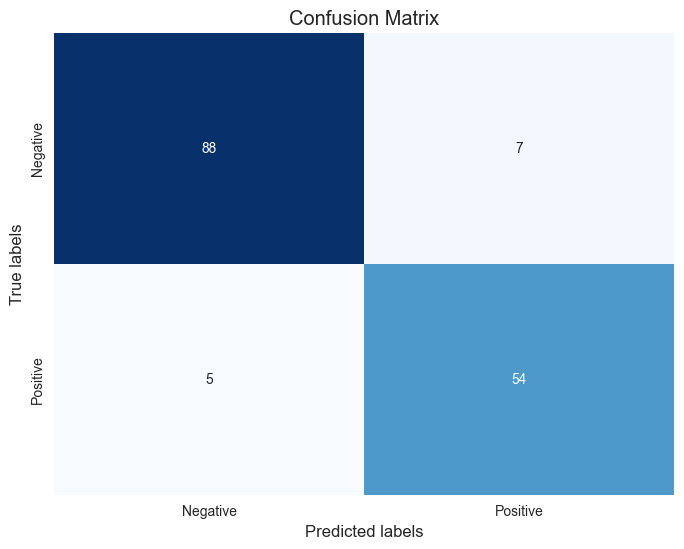

In [ ]:
report = classification_report(y_test,y_pred)
print("Classification Report:\n",report)

#Plot the confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
ax = plt.subplot()

sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",cbar=False,ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

plt.show()

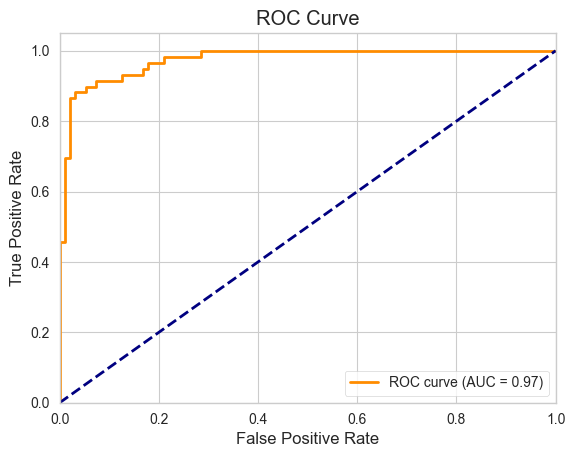

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_scores = best_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


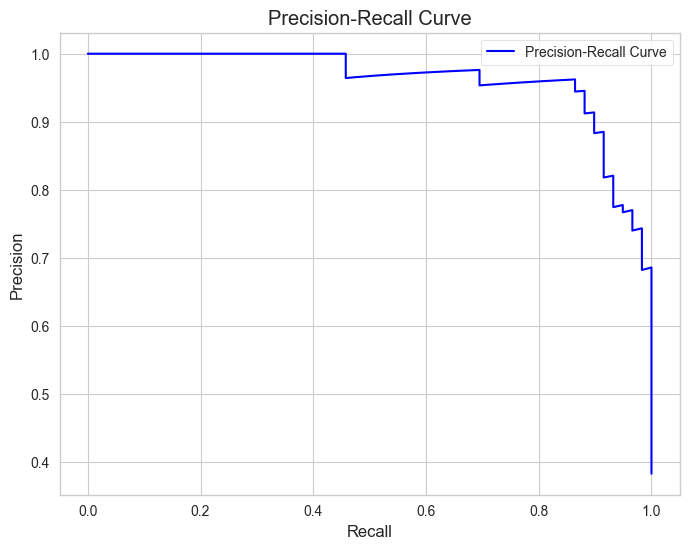

In [ ]:
from sklearn.metrics import precision_recall_curve

y_pred = best_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()